In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
mydata = pd.read_csv("/content/Housing (1).csv")

In [ ]:
mydata.shape


(545, 13)

In [ ]:
mydata.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
categorical_columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
df_encoded = pd.get_dummies(mydata,columns=categorical_columns,drop_first=True,dtype=int)
print(df_encoded.head())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2             1   
1  12250000  8960         4          4        4        3             1   
2  12250000  9960         3          2        2        2             1   
3  12215000  7500         4          2        2        3             1   
4  11410000  7420         4          1        2        2             1   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0              0             0                    0                    1   
1              0             0                    0                    1   
2              0             1                    0                    0   
3              0             1                    0                    1   
4              1             1                    0                    1   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0             1  

In [ ]:
df_encoded.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
parking,int64
mainroad_yes,int64
guestroom_yes,int64
basement_yes,int64
hotwaterheating_yes,int64


In [ ]:
x = df_encoded.drop(columns=['airconditioning_yes','price'])
y = df_encoded['airconditioning_yes']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [ ]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df_encoded.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df_encoded.index)) * 100))

80.00% data is in training set
20.00% data is in test set


In [ ]:
y_pred = logistic_model.predict(x_test)

In [ ]:
model_score= logistic_model.score(x_test,y_test)
print(model_score)

0.7247706422018348


<Axes: >

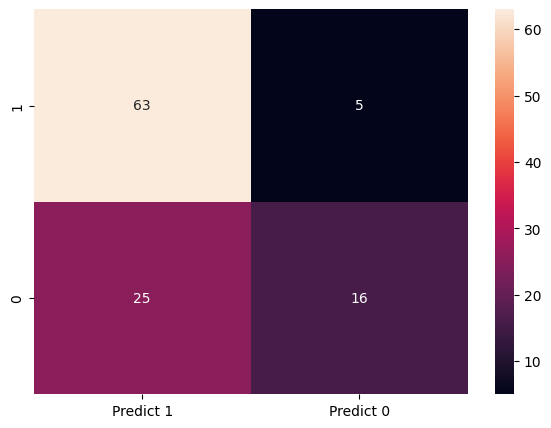

In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred,labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)